<a href="https://colab.research.google.com/github/Agbltnb/Ia/blob/main/Knn2_byM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import cluster, neighbors, svm, metrics, preprocessing


Importando o banco de dados

In [ ]:
df = pd.read_csv('framingham_heart_disease.csv', low_memory=False)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.head() #Observando a aparência do dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Apagando algumas colunas


In [ ]:
df.dropna()
df = df.drop(['education'], axis=1)
df

In [ ]:
df.dropna()
df = df.drop(['BPMeds'], axis=1)
df

In [ ]:
df.dropna()
df = df.drop(['prevalentStroke'], axis=1)
df

In [ ]:
df.dropna()
df = df.drop(['glucose'], axis=1)
df

In [ ]:
df.dropna()
df = df.drop(['prevalentHyp'], axis=1)
df

In [ ]:
#df.dropna()
#df = df.drop(['TenYearCHD'], axis=1)
#df

In [ ]:
print('Valores faltantes:', df.isnull().sum()) #quantidade de valores faltantes para todos os atributos

Valores faltantes: male              0
age               0
currentSmoker     0
cigsPerDay       29
diabetes          0
totChol          50
sysBP             0
diaBP             0
BMI              19
heartRate         1
TenYearCHD        0
dtype: int64


In [ ]:
df = df.dropna(how ='any') #elimina todas as linhas com dados ausentes
df

,male,age,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,1,30.0,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0,313.0,179.0,92.0,25.97,66.0,1
4234,1,51,1,43.0,0,207.0,126.5,80.0,19.71,65.0,0
4235,0,48,1,20.0,0,248.0,131.0,72.0,22.00,84.0,0
4236,0,44,1,15.0,0,210.0,126.5,87.0,19.16,86.0,0


Pré-processamento


In [ ]:
df.mean() #cálculo da mediana

male               0.432850
age               49.551208
currentSmoker      0.489372
cigsPerDay         8.982609
diabetes           0.025604
totChol          236.729710
sysBP            132.292391
diaBP             82.898913
BMI               25.794527
heartRate         75.836473
TenYearCHD         0.150242
dtype: float64

In [ ]:
le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])
        
print(df)

      male  age  currentSmoker  cigsPerDay  ...  diaBP    BMI  heartRate  TenYearCHD
0        1   39              0         0.0  ...   70.0  26.97       80.0           0
1        0   46              0         0.0  ...   81.0  28.73       95.0           0
2        1   48              1        20.0  ...   80.0  25.34       75.0           0
3        0   61              1        30.0  ...   95.0  28.58       65.0           1
4        0   46              1        23.0  ...   84.0  23.10       85.0           0
...    ...  ...            ...         ...  ...    ...    ...        ...         ...
4233     1   50              1         1.0  ...   92.0  25.97       66.0           1
4234     1   51              1        43.0  ...   80.0  19.71       65.0           0
4235     0   48              1        20.0  ...   72.0  22.00       84.0           0
4236     0   44              1        15.0  ...   87.0  19.16       86.0           0
4237     0   52              0         0.0  ...   83.0  21.47    

In [ ]:
print('Valores faltantes:', df.isnull().sum()) #quantidade de valores faltantes para todos os atributos

Valores faltantes: male             0
age              0
currentSmoker    0
cigsPerDay       0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
TenYearCHD       0
dtype: int64


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:,10].values

Divisão Treino e Teste


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:

Normalizando os valores 

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Treinamento

In [159]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')   #para mudar o valor de k, é só mudar no n_neighbors
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [160]:

y_pred = classifier.predict(X_test)
print('Predição\n', y_pred)
print('Teste\n', y_test)

Predição
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 

Avaliando o algoritmo


In [161]:
from sklearn.metrics import classification_report, confusion_matrix
print('Matriz de Confusão:\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Matriz de Confusão:
 [[661  28]
 [126  13]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       689
           1       0.32      0.09      0.14       139

    accuracy                           0.81       828
   macro avg       0.58      0.53      0.52       828
weighted avg       0.75      0.81      0.77       828



Text(0, 0.5, 'Erro médio')

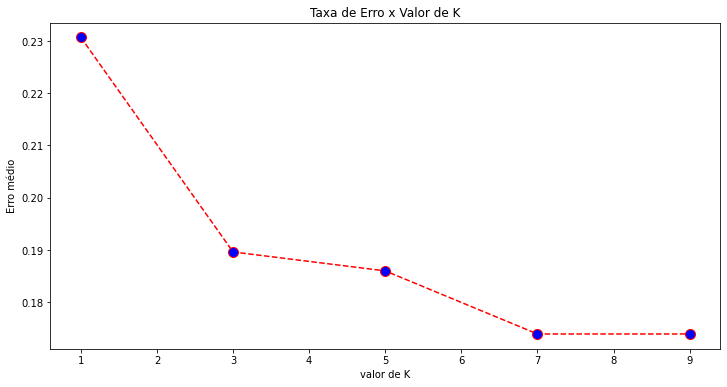

In [162]:

# Calculando erro médio dos valores previstos do conjunto de teste
error = []

for i in range(1, 10, 2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

# Plotando o gráfico dos valores em *error* em relação aos valores de K
plt.figure(figsize=(12,6))
plt.plot(range(1, 10, 2), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taxa de Erro x Valor de K')
plt.xlabel('valor de K')
plt.ylabel('Erro médio')